# Section 1: Bussiness Understanding

In this project I was interested in analysing an airbnb dataset of Seattle with the focus on the price:

#### Question 1: 
How does the spatial distribution look like? Are there reasons for higher prices in certain regions?
#### Question 2: 
How much money was generated by each airbnb accommodation? How does the spatial distribution look like?
#### Question 3: 
What other factors have an influence on the price?

# Section 2: Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

Read in the first dataframe called "calendar"

In [2]:
df_cal1 = pd.read_csv('calendar1.csv')
df_cal2 = pd.read_csv('calendar2.csv')
df_cal = pd.concat([df_cal1, df_cal2])
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
df_cal.shape

(1393570, 4)

Check how many rows contain NaN in the price column

In [4]:
df_temp = df_cal[df_cal['price'].isnull()==0]
df_temp

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00
...,...,...,...,...
671967,10208623,2016-01-06,t,$87.00
671968,10208623,2016-01-07,t,$87.00
671971,10208623,2016-01-10,t,$87.00
671972,10208623,2016-01-11,t,$87.00


Read in the second dataframe

In [5]:
df_lis = pd.read_csv('listings.csv')
df_lis.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [7]:
df_lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


Find out how many rows contain integers, floats and objects

In [8]:
df_lis.select_dtypes(['object']).shape

(3818, 62)

In [9]:
df_lis.select_dtypes(['int64','float64']).shape

(3818, 30)

Have a look at what data are in the dataframe

In [10]:
list(df_lis.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


# Section 3: Data Preparation

We are interested in the spatial distribution of the data. Therefore, we need location data:

In [11]:
df_lis[['latitude','longitude']]

,latitude,longitude
0,47.636289,-122.371025
1,47.639123,-122.365666
2,47.629724,-122.369483
3,47.638473,-122.369279
4,47.632918,-122.372471
...,...,...
3813,47.664295,-122.359170
3814,47.649552,-122.318309
3815,47.508453,-122.240607
3816,47.632335,-122.275530


To group the accomodations into groups, we round these columns to two numbers after the comma:

In [12]:
df_lis[['latitude','longitude']] = df_lis[['latitude','longitude']].round(2)

The column 'amenities' contains a lot of information about the interior of the airbnb but it is in an unfortunate format

In [13]:
df_lis['amenities']

0       {TV,"Cable TV",Internet,"Wireless Internet","A...
1       {TV,Internet,"Wireless Internet",Kitchen,"Free...
2       {TV,"Cable TV",Internet,"Wireless Internet","A...
3       {Internet,"Wireless Internet",Kitchen,"Indoor ...
4       {TV,"Cable TV",Internet,"Wireless Internet",Ki...
                              ...                        
3813    {TV,"Cable TV",Internet,"Wireless Internet","A...
3814    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
3815    {"Cable TV","Wireless Internet",Kitchen,"Free ...
3816    {TV,"Wireless Internet",Kitchen,"Free Parking ...
3817    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, Length: 3818, dtype: object

First all strings are cleaned from characters we do not want

In [14]:
## Cleaning the strings and splitting each amenity into a different column
df_lis['amenities'] = df_lis['amenities'].replace('{|}| |"', '', regex=True)

All different amenities are split into different columns

In [15]:
df_lis['amenities'] = df_lis['amenities'].replace(',', ' ', regex=True)
df_ame = pd.DataFrame(df_lis['amenities'].str.split(expand=True))

Next, a list called amenities is created with all available amenities.

In [16]:
amenities = []
for u in range(df_ame.shape[0]):
    for uu in range(df_ame.shape[1]):
        if (df_ame[uu][u] in amenities):
            True
        else:
            amenities += [df_ame[uu][u]]
amenities = list(filter(None,amenities)) # delete None
df_ame = df_ame.fillna(value=np.nan)
amenities

['TV',
 'CableTV',
 'Internet',
 'WirelessInternet',
 'AirConditioning',
 'Kitchen',
 'Heating',
 'Family/KidFriendly',
 'Washer',
 'Dryer',
 'FreeParkingonPremises',
 'Buzzer/WirelessIntercom',
 'SmokeDetector',
 'CarbonMonoxideDetector',
 'FirstAidKit',
 'SafetyCard',
 'FireExtinguisher',
 'Essentials',
 'PetsAllowed',
 'Petsliveonthisproperty',
 'Dog(s)',
 'Cat(s)',
 'HotTub',
 'IndoorFireplace',
 'Shampoo',
 'Breakfast',
 '24-HourCheck-in',
 'Hangers',
 'HairDryer',
 'Iron',
 'LaptopFriendlyWorkspace',
 'SuitableforEvents',
 'ElevatorinBuilding',
 'LockonBedroomDoor',
 'WheelchairAccessible',
 'Gym',
 'Pool',
 'SmokingAllowed',
 'Otherpet(s)',
 'Doorman',
 'Washer/Dryer']

Now a new dataframe is created with the amenities in the columns. The number in the row tells if this particular amenity is available or not (1 for yes, 0 for no)

In [17]:
df_new = pd.DataFrame(index=range(len(df_ame)), columns=amenities)
for i in range(len(df_new)):
    for ii in range(df_ame.shape[1]):
        var = df_ame.iloc[i][ii]
        if (df_ame.iloc[i][ii] in amenities):
            df_new[var].iloc[i] = 1
        else:
            False
df_new = df_new.fillna(0)
df_new = df_new.astype(int)

The new dataframe is added to the original dataframe

In [18]:
df_lis = pd.concat([df_lis,df_new],axis=1)

The price and percentage column have to be changed from string to float. First the columns have to be cleaned from non convertable characters. 

In [19]:
df_lis['price'] = df_lis['price'].str.replace('$', '').str.replace(',', '').astype(float)
df_lis['price'].head(3)

0     85.0
1    150.0
2    975.0
Name: price, dtype: float64

Some columns contain a 't' or 'f'. It is easier to handle these columns later if they contain '1' and '0' instead:

In [20]:
df_lis = df_lis.replace('t',1).replace('f',0)

Similar to the price columns, the columns with percent numbers are changed into floats.

In [21]:
percent_column = df_lis.select_dtypes(include=['object']).columns
for percent_count in percent_column:
    try:
        df_lis[percent_count] = df_lis[percent_count].str.replace('%', '').astype(float)
    except:
        True

Columns which contain for all rows the same value can be dropped:

In [22]:
nunique = df_lis.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
df_lis = df_lis.drop(cols_to_drop, axis=1)

There are also many object columns which contain a different element for each row such as "description" or the url of the website. Here, these informations are not further handled and therefore all remaining object columns were dropped.

In [23]:
cat_vars = df_lis.select_dtypes(include=['object'])
df_lis = df_lis.drop(cat_vars,axis=1)

Since we are analysing the price, we don't handle rows, which do not contain a price. These rows are dropped.

In [24]:
df_lis = df_lis.dropna(subset=['price'], axis=0)

Columns with mostly NaN's are dropped. Here the value is set to 75%

In [25]:
too_many_NAN = list(df_lis.columns[df_lis.isnull().mean() > 0.75])
for count_2 in too_many_NAN:
    df_lis = df_lis.drop([count_2], axis=1)

Additional columns are dropped which disturb the modeling.

In [26]:
df_lis = df_lis.drop(['host_listings_count','host_total_listings_count','host_acceptance_rate'],axis=1)

The remaining NaN of the remaining columns are filled the the average values of each column

In [27]:
num_vars = df_lis.select_dtypes(include=['float', 'int32']).columns
for col in num_vars:
    df_lis[col].fillna((df_lis[col].mean()), inplace=True)

Finally our dataframe looks as follows:

In [28]:
df_lis.head(5)

,id,host_id,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,accommodates,...,SuitableforEvents,ElevatorinBuilding,LockonBedroomDoor,WheelchairAccessible,Gym,Pool,SmokingAllowed,Otherpet(s),Doorman,Washer/Dryer
0,241032,956883,96.000000,0.0,1.0,1.0,47.64,-122.37,1,4,...,0,0,0,0,0,0,0,0,0,0
1,953595,5177328,98.000000,1.0,1.0,1.0,47.64,-122.37,1,4,...,0,0,0,0,0,0,0,0,0,0
2,3308979,16708587,67.000000,0.0,1.0,1.0,47.63,-122.37,1,11,...,0,0,0,0,0,0,0,0,0,0
3,7421966,9851441,94.886798,0.0,1.0,1.0,47.64,-122.37,1,3,...,0,0,0,0,0,0,0,0,0,0
4,278830,1452570,100.000000,0.0,1.0,1.0,47.63,-122.37,1,6,...,0,0,0,0,0,0,0,0,0,0


In our calendar dataframe all rows in the price columns with NaN are dropped.

In [29]:
df_cal = df_cal.dropna(subset=['price'], axis=0)

In [30]:
df_cal.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00


Change the price column to a float

In [31]:
df_cal['price'] = df_cal['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Section 4: Modeling

For the modeling X and y are created

In [32]:
X = df_lis.drop(['price'], axis=1)
y = df_lis['price']

# Split the data in a test and training set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=6)

# Create a LinearRegression model with normalized data
lm_model = LinearRegression(normalize=True)

# Fit our model with the training data
lm_model.fit(X_train,y_train)

# Predict our data using our test set
y_pred = lm_model.predict(X_test)

# Compare the predicted with the test data and return the r-value
rsquared_score = r2_score(y_test,y_pred)

print('The r-squared-score is: ' + str(rsquared_score))

The r-squared-score is: 0.5777005026626701


# Section 5: Evaluation

#### Question 1:

To group the airbnb accommodation into spatial groups a pivot table is created. The value is the corrected price column from before.

In [33]:
pivot1 = pd.pivot_table(df_lis,values = 'price', aggfunc=np.mean, index = ['latitude'],columns = 'longitude')

A heatmap is used to show how average prices are vary with location

Text(0.5, 1.0, 'Mean prices of airbnb accomodations in Seattle\n')

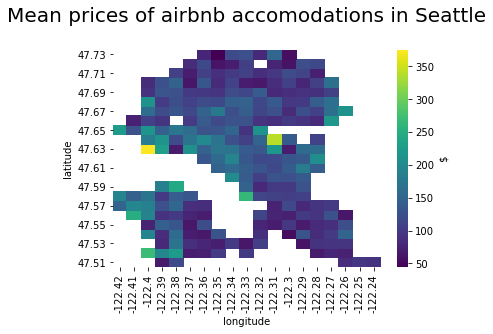

In [34]:
ax = sns.heatmap(pivot1,cmap = 'viridis',cbar_kws={'label': '$'})
ax.invert_yaxis()
ax.set_title('Mean prices of airbnb accomodations in Seattle\n',fontsize =20)

We can see that, two factors seem to influence the price of the airbnb accommodation. On one side the distance to the city center is important and on the other side distance to the sea. An exception is the accommodation near the harbour in the bay.

#### Question 2:

For this we need to merge both dataframes together. First, the id column of 'calendar' dataframe has to be renamed and grouped.

In [35]:
df_lis2 = df_lis[['id','latitude','longitude']].round(2)
df_cal = df_cal.rename(columns={"listing_id": "id"})
df_cal = df_cal.groupby(['id']).sum()
df_new = pd.merge(df_cal, df_lis2, on='id')

To visualize, again the heatmap is used as in Question 1

Text(0.5, 1.0, 'Absolut income per region of airbnb accomodations in Seattle\n')

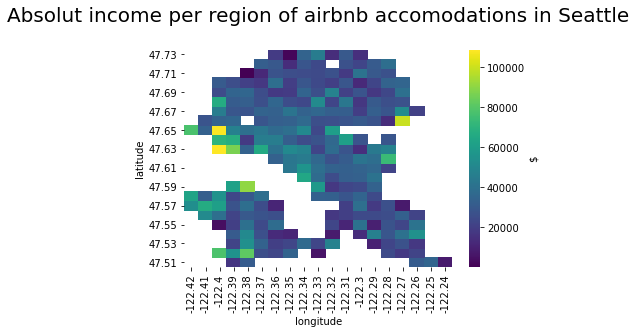

In [36]:
pivot2 = pd.pivot_table(df_new,values = 'price', aggfunc=np.mean, index = ['latitude'],columns = 'longitude')
ax = sns.heatmap(pivot2,cmap = 'viridis',cbar_kws={'label': '$'})
ax.invert_yaxis()
ax.set_title('Absolut income per region of airbnb accomodations in Seattle\n',fontsize =20)

The plot looks similar to the plot in Question 1. Nevertheless, there are some regions, which are very popular and have medium average prices. 

#### Question 3:

The coefficients calculated with our model are saved to a new datafram called coefs_df

In [37]:
coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = lm_model.coef_
coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)

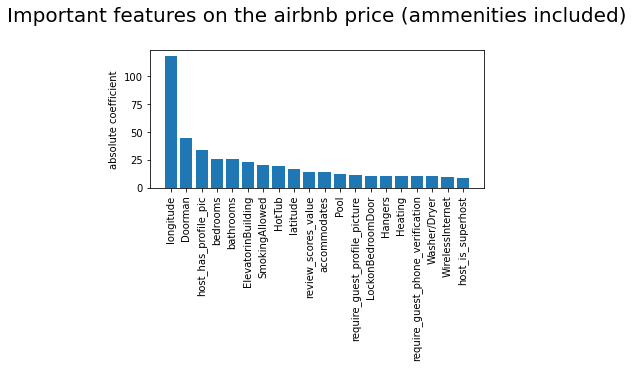

In [38]:
features = 20
ax = plt.bar(coefs_df['est_int'][:features],coefs_df['abs_coefs'][:features])
y_pos = range(len(coefs_df['est_int'][:features]))
plt.xticks(y_pos, coefs_df['est_int'][:features], rotation=90)
plt.title('Important features on the airbnb price (ammenities included)\n',fontsize = 20)
plt.ylabel('absolute coefficient')
plt.subplots_adjust(bottom=0.4)

The location seems to be an important factor on the price. There are other factors such as the amount of bedrooms, the reviews and some amenities.